<a href="https://colab.research.google.com/github/DrishtantGithub/GeoHack-2024-Codebase/blob/main/Summer_Project_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('/content/drive/MyDrive/output.csv')

In [54]:
data.head()

,Date,stid,Daily Solar Energy,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,...,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,1994-01-01,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.38380,258.64188,282.54855,...,219.09091,284.39706,280.26060,8.086300,47.745450,0.003322,364.31980,282.35430,0.000000,102023.780
1,1994-01-02,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.38722,279.48965,282.33215,...,166.90909,283.79266,279.78726,11.476501,32.618183,0.003798,358.07530,282.07254,0.031273,101307.500
2,1994-01-03,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.27985,227.04659,277.42630,...,225.32729,277.42557,273.05588,6.755241,49.072730,0.002511,335.16843,275.72464,0.000000,101984.920
3,1994-01-04,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.66994,238.26636,277.47464,...,226.21817,278.94736,275.17150,5.734901,49.527270,0.002601,342.49518,276.33093,0.000909,102571.125
4,1994-01-05,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.21690,258.61813,282.66803,...,219.45454,283.42203,278.55490,9.284234,46.636364,0.003136,353.97708,282.82280,0.000000,100769.320


<Axes: >

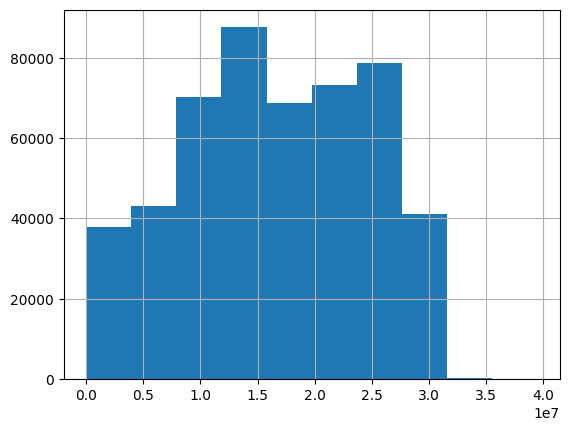

In [55]:
data['Daily Solar Energy'].hist()

In [56]:
# Dropping categorical variables
data = data.drop(columns=['new_distances', 'min_dist_node' , 'join'])

In [57]:
## Adding new features on the data related to timeseries
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday

In [58]:
data.head()

,Date,stid,Daily Solar Energy,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,...,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0,DayOfYear,Month,Weekday
0,1994-01-01,ACME,12384900,0.002298,254.38380,258.64188,282.54855,0.001273,219.09091,284.39706,...,8.086300,47.745450,0.003322,364.31980,282.35430,0.000000,102023.780,1,1,5
1,1994-01-02,ACME,11908500,0.069067,231.38722,279.48965,282.33215,0.069091,166.90909,283.79266,...,11.476501,32.618183,0.003798,358.07530,282.07254,0.031273,101307.500,2,1,6
2,1994-01-03,ACME,12470700,0.001782,241.27985,227.04659,277.42630,0.000909,225.32729,277.42557,...,6.755241,49.072730,0.002511,335.16843,275.72464,0.000000,101984.920,3,1,0
3,1994-01-04,ACME,12725400,0.003251,244.66994,238.26636,277.47464,0.002727,226.21817,278.94736,...,5.734901,49.527270,0.002601,342.49518,276.33093,0.000909,102571.125,4,1,1
4,1994-01-05,ACME,10894800,0.025482,242.21690,258.61813,282.66803,0.024364,219.45454,283.42203,...,9.284234,46.636364,0.003136,353.97708,282.82280,0.000000,100769.320,5,1,2


In [59]:
station_data = data[data['stid']=='KENT']

In [60]:
station_data.reset_index(drop=True, inplace=True)

<Axes: >

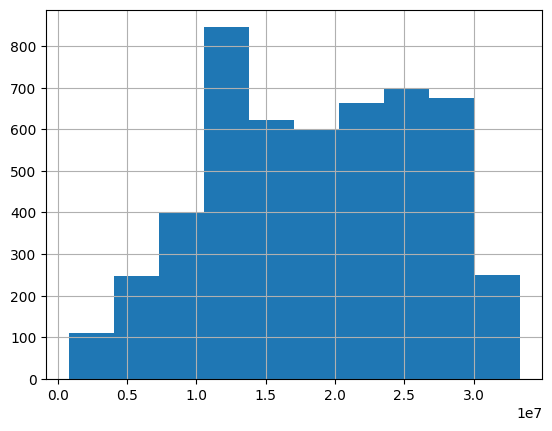

In [61]:
station_data['Daily Solar Energy'].hist()

In [62]:
station_data.head()

,Date,stid,Daily Solar Energy,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,...,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0,DayOfYear,Month,Weekday
0,1994-01-01,KENT,11189400,0.007535,238.54745,230.89642,278.05942,0.006545,214.90909,279.56433,...,6.331754,57.581820,0.002144,338.50160,277.72232,0.0,101978.160,1,1,5
1,1994-01-02,KENT,11624400,0.001007,250.69635,232.90785,280.04126,0.000545,224.00000,281.22726,...,3.812866,60.763638,0.001589,351.05713,280.07513,0.0,101843.370,2,1,6
2,1994-01-03,KENT,12391500,0.000985,244.18892,232.21022,278.72630,0.000182,218.03636,280.36430,...,6.582514,58.763634,0.002023,340.51385,278.58792,0.0,101625.180,3,1,0
3,1994-01-04,KENT,12091500,0.002702,242.54266,231.01183,278.20193,0.002545,217.89091,278.23460,...,7.633083,58.018185,0.002352,339.44064,276.65550,0.0,102581.445,4,1,1
4,1994-01-05,KENT,9648000,0.050782,206.56235,270.98178,284.75714,0.050000,207.27272,287.03660,...,6.020598,52.890907,0.001820,371.68613,285.57083,0.0,100397.230,5,1,2


In [63]:
station_data.shape

(5113, 21)

In [64]:
print(min(station_data['Daily Solar Energy'])/(10**6),max(station_data['Daily Solar Energy'])/(10**6))

0.7938 33.3039


In [65]:
station_data= station_data[(station_data['Daily Solar Energy'] >= 10.0*(10**6)) & (station_data['Daily Solar Energy'] <= 25.0*(10**6))]

<Axes: >

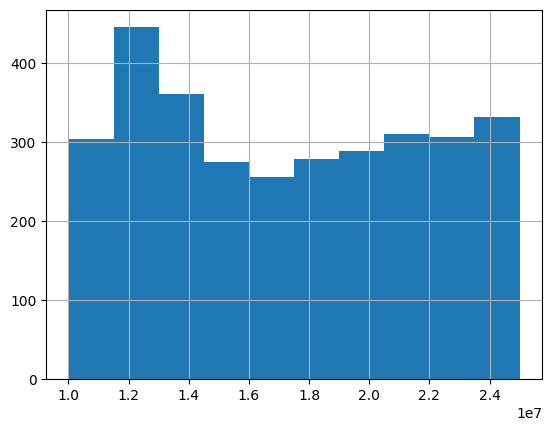

In [66]:
station_data['Daily Solar Energy'].hist()


In [67]:
X = station_data.drop(['Date','stid','Daily Solar Energy'],axis=1)
y = station_data.drop(['Daily Solar Energy'],axis=1)

In [68]:
X.columns

Index(['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0',
       'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0',
       'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0',
       'pres_msl_0', 'DayOfYear', 'Month', 'Weekday'],
      dtype='object')

In [69]:
target_col = 'Daily Solar Energy'

In [70]:
data_numeric = station_data.drop(columns=['Date', 'stid'])

corr_matrix = data_numeric.corr()

threshold = 0.75

high_corr_pairs = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i + 1, corr_matrix.shape[1]) if abs(corr_matrix.iloc[i, j]) > threshold]

features_to_drop = set()

for i, j in high_corr_pairs:
    feature_i = corr_matrix.columns[i]
    feature_j = corr_matrix.columns[j]

    if feature_i not in features_to_drop and feature_j not in features_to_drop:
        features_to_drop.add(feature_j)

print(f"Features to drop: {features_to_drop}")

data_selected = data_numeric.drop(columns=list(features_to_drop))

print(data_selected.head())

Features to drop: {'tmax_2m_0', 'tmin_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'tcdc_eatm_0', 'dswrf_sfc_0', 'spfh_2m_0', 'pwat_eatm_0', 'tmp_sfc_0', 'Month'}
   Daily Solar Energy  tcolc_eatm_0  ulwrf_tatm_0  dlwrf_sfc_0  uswrf_sfc_0  \
0            11189400      0.007535     238.54745    230.89642    57.581820   
1            11624400      0.001007     250.69635    232.90785    60.763638   
2            12391500      0.000985     244.18892    232.21022    58.763634   
3            12091500      0.002702     242.54266    231.01183    58.018185   
6            12466200      0.002156     233.88394    216.61884    71.945450   

   apcp_sfc_0  pres_msl_0  DayOfYear  Weekday  
0    0.000000  101978.160          1        5  
1    0.000000  101843.370          2        6  
2    0.000000  101625.180          3        0  
3    0.000000  102581.445          4        1  
6    0.059636  102604.410          7        4  


In [71]:
data_selected.columns

Index(['Daily Solar Energy', 'tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0',
       'uswrf_sfc_0', 'apcp_sfc_0', 'pres_msl_0', 'DayOfYear', 'Weekday'],
      dtype='object')

In [72]:
data_selected.head()

,Daily Solar Energy,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,uswrf_sfc_0,apcp_sfc_0,pres_msl_0,DayOfYear,Weekday
0,11189400,0.007535,238.54745,230.89642,57.581820,0.000000,101978.160,1,5
1,11624400,0.001007,250.69635,232.90785,60.763638,0.000000,101843.370,2,6
2,12391500,0.000985,244.18892,232.21022,58.763634,0.000000,101625.180,3,0
3,12091500,0.002702,242.54266,231.01183,58.018185,0.000000,102581.445,4,1
6,12466200,0.002156,233.88394,216.61884,71.945450,0.059636,102604.410,7,4


In [73]:
data_selected['dswrf_sfc_0'] = data_numeric['dswrf_sfc_0']

data_selected['tmp_sfc_0'] = data_numeric['tmp_sfc_0']



In [74]:
data_selected['tcdc_eatm_0'] = data_numeric['tcdc_eatm_0']

data_selected['pwat_eatm_0'] = data_numeric['pwat_eatm_0']

In [75]:
X_ = data_selected.drop(['Daily Solar Energy'],axis = 1)
y_ = data_selected['Daily Solar Energy']

In [76]:
X_.head()

,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,uswrf_sfc_0,apcp_sfc_0,pres_msl_0,DayOfYear,Weekday,dswrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,pwat_eatm_0
0,0.007535,238.54745,230.89642,57.581820,0.000000,101978.160,1,5,214.90909,278.05942,0.006545,6.331754
1,0.001007,250.69635,232.90785,60.763638,0.000000,101843.370,2,6,224.00000,280.04126,0.000545,3.812866
2,0.000985,244.18892,232.21022,58.763634,0.000000,101625.180,3,0,218.03636,278.72630,0.000182,6.582514
3,0.002702,242.54266,231.01183,58.018185,0.000000,102581.445,4,1,217.89091,278.20193,0.002545,7.633083
6,0.002156,233.88394,216.61884,71.945450,0.059636,102604.410,7,4,230.25455,274.77414,0.001636,3.058250


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [78]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_)

In [79]:
def create_sequences(data, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(target[i + sequence_length])
    return np.array(sequences), np.array(targets)

In [80]:
sequence_length = 7  # for 7 days of data

In [81]:
X_seq, y_seq = create_sequences(X_scaled, y_.values, sequence_length)

In [82]:
# Split into train and test sets
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

In [83]:
# Verify the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2516, 7, 12) (629, 7, 12) (2516,) (629,)


In [84]:
X_train

array([[[-3.89091784e-01, -5.62614790e-01, -1.06272929e+00, ...,
         -1.11955196e+00, -3.96632597e-01, -6.97124982e-01],
        [-4.92108891e-01, -1.25569750e-01, -1.02326645e+00, ...,
         -9.28751960e-01, -4.91140785e-01, -1.00521278e+00],
        [-4.92453236e-01, -3.59668311e-01, -1.03695346e+00, ...,
         -1.05534864e+00, -4.96868555e-01, -6.66454227e-01],
        ...,
        [-4.73973285e-01, -7.30380095e-01, -1.34284537e+00, ...,
         -1.43583956e+00, -4.73957475e-01, -1.09751060e+00],
        [-4.33541218e-01, -6.60455910e-01, -1.28088057e+00, ...,
         -1.26555559e+00, -4.25271428e-01, -9.08770026e-01],
        [-4.30269929e-01, -6.04768453e-01, -1.12114261e+00, ...,
         -1.05576743e+00, -4.42454738e-01, -9.42411190e-01]],

       [[-4.92108891e-01, -1.25569750e-01, -1.02326645e+00, ...,
         -9.28751960e-01, -4.91140785e-01, -1.00521278e+00],
        [-4.92453236e-01, -3.59668311e-01, -1.03695346e+00, ...,
         -1.05534864e+00, -4.96868555e

In [85]:
y_train

array([10877700, 12906600, 12924000, ..., 23283900, 21103500, 19801800])

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization , GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Define and compile the CNN model
n_features = X_train.shape[2]




In [87]:
n_features = X_train.shape[2]
print(n_features)

12


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, GlobalAveragePooling1D, Concatenate, Multiply, Add, LayerNormalization, Dropout, Activation, Bidirectional , LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2



In [89]:
def squeeze_excite_block(input):
    se = GlobalAveragePooling1D()(input)
    se = Dense(input.shape[-1] // 16, activation='relu')(se)
    se = Dense(input.shape[-1], activation='sigmoid')(se)
    return Multiply()([input, se])


In [90]:
def attention_block(input):
    attention = Conv1D(1, kernel_size=1)(input)
    attention = Activation('softmax')(attention)
    return Multiply()([input, attention])

In [91]:
def residual_inception_se_block(input, filters):
    # Adjust input channel size if necessary
    if input.shape[-1] != filters * 3:
        input = Conv1D(filters * 3, kernel_size=1, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(input)

    branch1 = Conv1D(filters, kernel_size=1, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(input)

    branch2 = Conv1D(filters, kernel_size=1, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(input)
    branch2 = Conv1D(filters, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(branch2)

    branch3 = Conv1D(filters, kernel_size=1, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(input)
    branch3 = Conv1D(filters, kernel_size=5, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(branch3)

    outputs = Concatenate()([branch1, branch2, branch3])
    outputs = squeeze_excite_block(outputs)
    outputs = attention_block(outputs)

    return Add()([input, outputs])


In [92]:
def create_advanced_model(sequence_length, n_features):
    inputs = Input(shape=(sequence_length, n_features))

    x = Conv1D(64, kernel_size=1, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(inputs)
    x = LayerNormalization()(x)

    for i in range(4):  # Stacking multiple blocks
        x = residual_inception_se_block(x, 64)
        x = LayerNormalization()(x)
        x = Dropout(0.1)(x)

    x = GlobalAveragePooling1D()(x)

    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.2)(x)

    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model


In [93]:
def compute_extrema_penalty(y_true, y_pred):
    # Cast both tensors to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Compute the difference between adjacent elements
    diff_true = tf.abs(y_true[:, 1:] - y_true[:, :-1])
    diff_pred = tf.abs(y_pred[:, 1:] - y_pred[:, :-1])

    # Find local maxima and minima
    is_extrema = tf.logical_or(
        tf.logical_and(diff_true[:, :-1] > 0, diff_true[:, 1:] < 0),  # local maxima
        tf.logical_and(diff_true[:, :-1] < 0, diff_true[:, 1:] > 0)   # local minima
    )

    # Compute the squared error at extrema points
    extrema_error = tf.square(y_true[:, 1:-1] - y_pred[:, 1:-1])
    extrema_penalty = tf.reduce_mean(tf.boolean_mask(extrema_error, is_extrema))

    return extrema_penalty

In [94]:
def create_improved_model(sequence_length, n_features):
    inputs = Input(shape=(sequence_length, n_features))

    # Initial convolution
    x = Conv1D(64, kernel_size=1, padding='same', activation='relu', kernel_regularizer=l2(1e-4))(inputs)
    x = LayerNormalization()(x)

    # Residual blocks
    for i in range(4):
        x = residual_inception_se_block(x, 64)
        x = LayerNormalization()(x)
        x = Dropout(0.1)(x)

    # LSTM layers
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)

    # Dense layers
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.2)(x)

    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Custom optimizer with learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=10000,
        decay_rate=0.9)
    optimizer = Adam(learning_rate=lr_schedule)

    # Custom loss function
    def custom_loss(y_true, y_pred):
        # Cast y_true to float32 to match y_pred
        y_true = tf.cast(y_true, tf.float32)
        mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
        extrema_penalty = compute_extrema_penalty(y_true, y_pred)
        return mse + 0.1 * extrema_penalty

    model.compile(optimizer=optimizer, loss=custom_loss, metrics=['mae'])
    return model

In [95]:
# Create the model
model = create_advanced_model(sequence_length, n_features)


In [96]:
improved_model = create_improved_model(sequence_length, n_features)

In [97]:
# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [98]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping, lr_scheduler])

Epoch 1/300
63/63 [==============================] - 16s 63ms/step - loss: 323899455700992.0000 - mae: 17433404.0000 - val_loss: 306496818642944.0000 - val_mae: 16902082.0000 - lr: 0.0010
Epoch 2/300
63/63 [==============================] - 3s 49ms/step - loss: 323778223538176.0000 - mae: 17429922.0000 - val_loss: 306226202148864.0000 - val_mae: 16894072.0000 - lr: 0.0010
Epoch 3/300
63/63 [==============================] - 5s 74ms/step - loss: 323164848521216.0000 - mae: 17412302.0000 - val_loss: 305166385414144.0000 - val_mae: 16862676.0000 - lr: 0.0010
Epoch 4/300
63/63 [==============================] - 3s 45ms/step - loss: 321298819448832.0000 - mae: 17358662.0000 - val_loss: 302403110830080.0000 - val_mae: 16780542.0000 - lr: 0.0010
Epoch 5/300
63/63 [==============================] - 3s 44ms/step - loss: 317093643812864.0000 - mae: 17237352.0000 - val_loss: 296718922940416.0000 - val_mae: 16610310.0000 - lr: 0.0010
Epoch 6/300
63/63 [==============================] - 3s 51ms/ste

In [99]:
from sklearn.model_selection import KFold
import numpy as np

def create_ensemble(n_models=5):
    models = []
    kfold = KFold(n_splits=n_models, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
        print(f"Training model {fold+1}/{n_models}")
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        model = create_advanced_model(sequence_length, n_features)

        history = model.fit(
            X_train_fold, y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=300,
            batch_size=32,
            callbacks=[lr_scheduler, early_stopping],
            verbose=0
        )

        models.append(model)

    return models

ensemble = create_ensemble()

def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return np.mean(predictions, axis=0)

y_pred = ensemble_predict(ensemble, X_test)

Training model 1/5
Training model 2/5
Training model 3/5
Training model 4/5
Training model 5/5
20/20 [==============================] - 1s 13ms/step


MAE: 1969270.8235294118
MSE: 8169023929894.871
RMSE: 2858150.4386394485


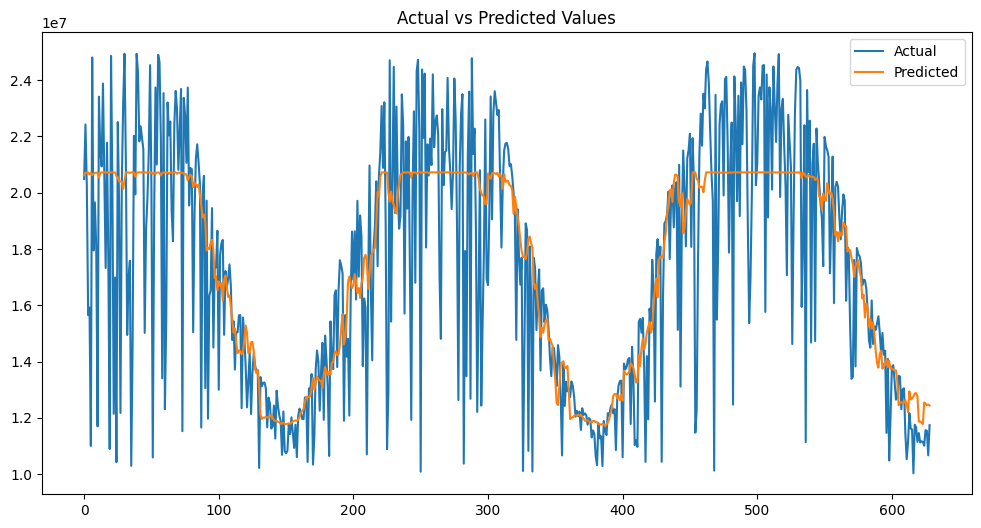

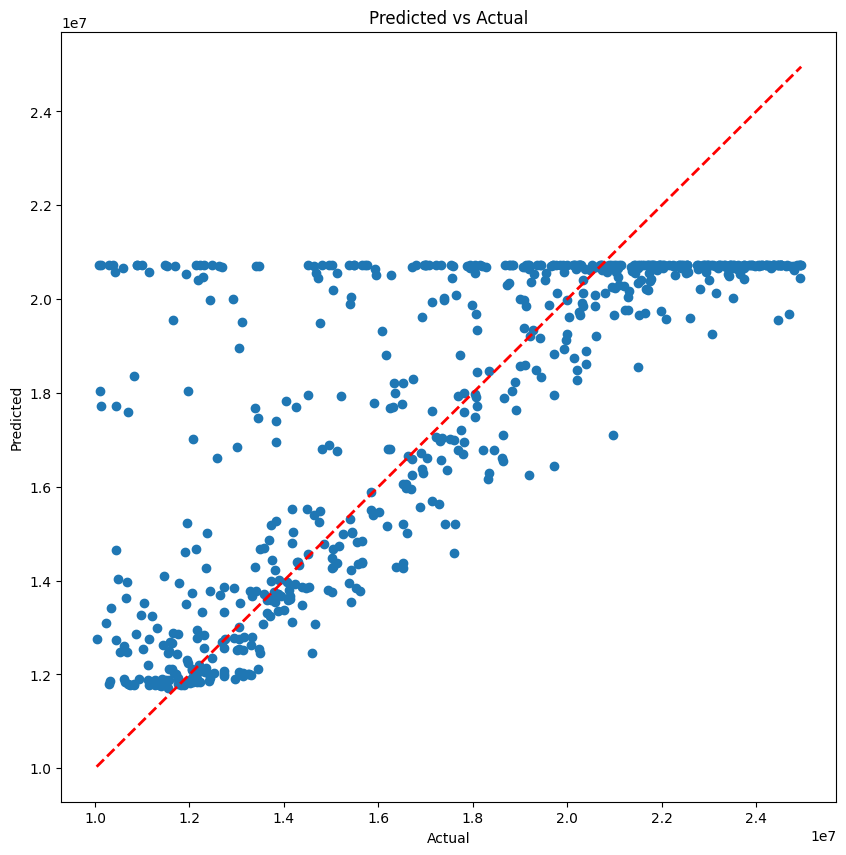

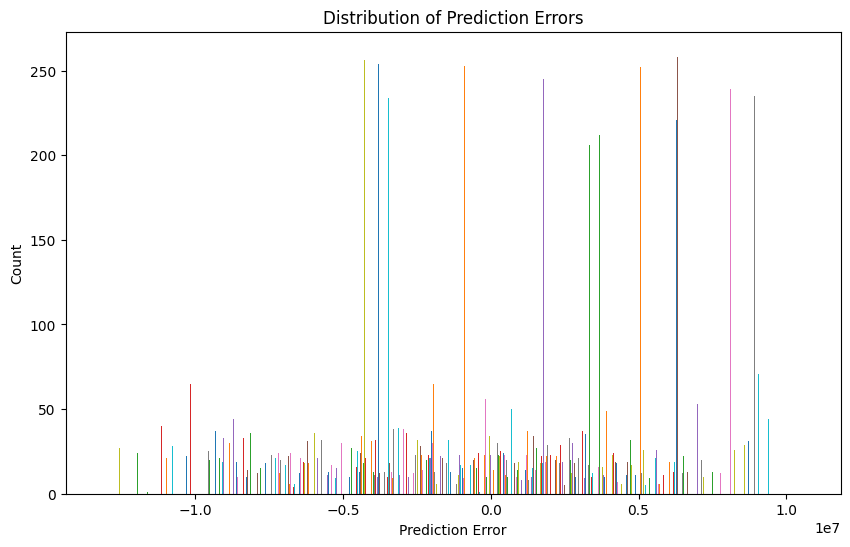

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have y_true (actual values) and y_pred (ensemble predictions)
y_true = y_test
# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Visualize predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

# Plot predicted vs actual
plt.figure(figsize=(10, 10))
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

# Error distribution
errors = y_pred - y_true
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()

In [142]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])


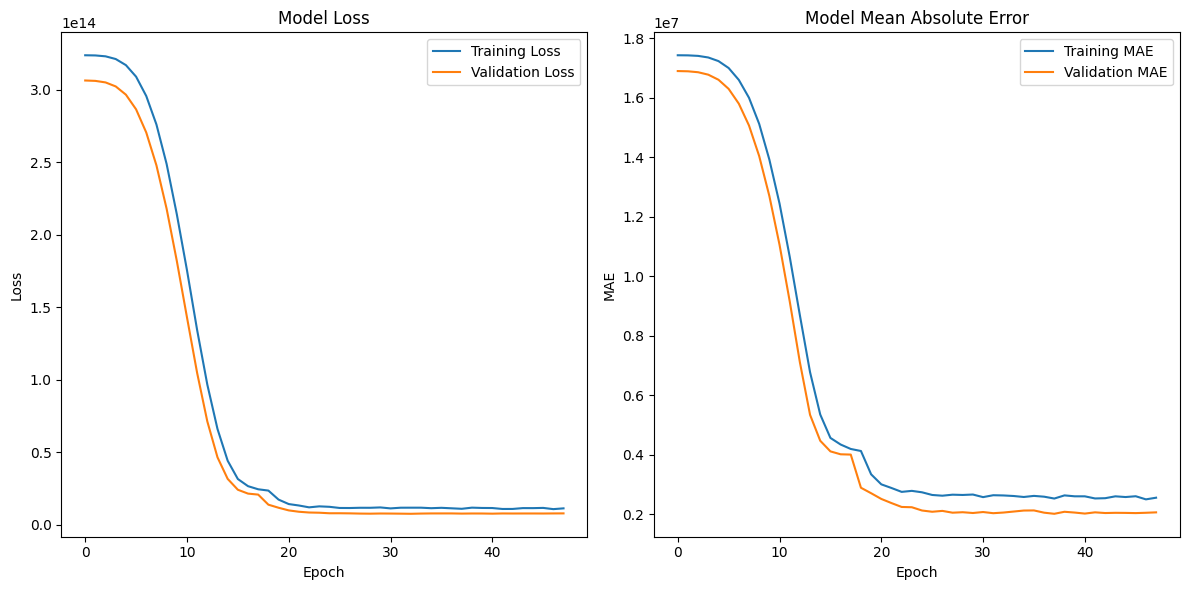

In [143]:
# Plotting the learning curve
def plot_learning_curve(history):
    # Summarize history for loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    # Summarize history for MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_learning_curve(history)

In [101]:
! pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.1 MB/s eta 0:00:00


In [102]:
import tensorflow as tf

In [103]:
# Apply Integrated Gradients
class IntegratedGradients:
    def __init__(self, model, baseline=None):
        self.model = model
        self.baseline = baseline if baseline is not None else np.zeros_like(X_test[0])

    def interpolate(self, input_data, steps=50):
        alphas = np.linspace(0, 1, steps)
        interpolated_data = np.array([self.baseline + alpha * (input_data - self.baseline) for alpha in alphas])
        return interpolated_data

    def get_gradients(self, input_data, target_index=None):
        input_data = tf.convert_to_tensor(input_data)
        with tf.GradientTape() as tape:
            tape.watch(input_data)
            predictions = self.model(input_data)
            if target_index is None:
                target = predictions[:, 0]
            else:
                target = predictions[:, target_index]
        gradients = tape.gradient(target, input_data)
        return gradients.numpy()

    def explain(self, input_data, target_index=None, steps=50):
        interpolated_data = self.interpolate(input_data, steps)
        gradients = self.get_gradients(interpolated_data, target_index)
        avg_gradients = np.mean(gradients, axis=0)
        integrated_gradients = (input_data - self.baseline) * avg_gradients
        return integrated_gradients


In [148]:
X_.columns

Index(['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'uswrf_sfc_0',
       'apcp_sfc_0', 'pres_msl_0', 'DayOfYear', 'Weekday', 'dswrf_sfc_0',
       'tmp_sfc_0', 'tcdc_eatm_0', 'pwat_eatm_0'],
      dtype='object')

In [104]:
# Initialize and compute Integrated Gradients
ig = IntegratedGradients(model)
ig_attributions = ig.explain(X_test[0])


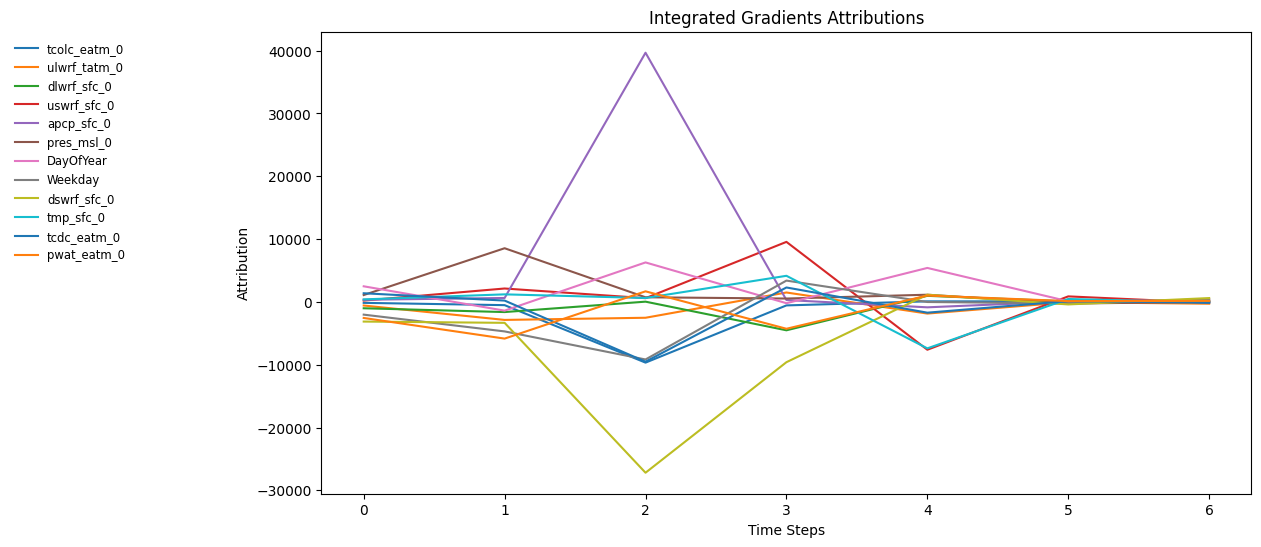

In [157]:
feature_names = ['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'uswrf_sfc_0',
                  'apcp_sfc_0', 'pres_msl_0', 'DayOfYear', 'Weekday',
                  'dswrf_sfc_0', 'tmp_sfc_0', 'tcdc_eatm_0', 'pwat_eatm_0']

# Select a sample from the test set for explanation
X_test_sample = X_test[1]

# Initialize and compute Integrated Gradients
ig = IntegratedGradients(model)
ig_attributions = ig.explain(X_test_sample)

# Ensure the number of features matches the number of attribution values
assert ig_attributions.shape[1] == len(feature_names), "Number of features does not match number of attribution values"

# Visualize attributions for the selected sample
plt.figure(figsize=(12, 6))
for i in range(ig_attributions.shape[1]):
    plt.plot(ig_attributions[:, i], label=feature_names[i])
plt.title('Integrated Gradients Attributions')
plt.xlabel('Time Steps')
plt.ylabel('Attribution')
plt.legend(bbox_to_anchor=(-0.2, 1), fontsize='small', frameon=False)
plt.show()

In [106]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=5be36417689ca347400df7fe17bc741f9a003f80aecde4413a2c3dc97c9b88e8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [107]:
# Original feature names
feature_names = data_selected.drop(columns=['Daily Solar Energy']).columns

# Create feature names for each time step
flattened_feature_names = []
for i in range(sequence_length):
    for feature in feature_names:
        flattened_feature_names.append(f"{feature}_t{i}")


In [108]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [109]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_flat,  # Reshape to 2D
    mode='regression',
    feature_names=flattened_feature_names,
    verbose=True,
    random_state=42
)

# Select a sample from the test set for explanation
X_test_sample = X_test_flat[50].reshape(1, -1)  # Reshape to 2D
y_test_sample = y_test[50]

# Define a prediction function that reshapes the input back to 3D for the model
def predict_fn(X):
    return model.predict(X.reshape(X.shape[0], sequence_length, n_features)).flatten()

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=X_test_sample[0],
    predict_fn=predict_fn,
    num_features=10  # Number of features to explain
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


157/157 [==============================] - 3s 14ms/step
Intercept 16093716.135777665
Prediction_local [19191742.63475544]
Right: 20432654.0


In [110]:
import numpy as np

def permutation_importance(model, X_val, y_val, metric, n_repeats=10):
    baseline = metric(y_val, model.predict(X_val))
    importances = np.zeros(X_val.shape[2])

    for i in range(X_val.shape[2]):
        scores = np.zeros(n_repeats)
        for n in range(n_repeats):
            X_permuted = X_val.copy()
            np.random.shuffle(X_permuted[:, :, i])
            permuted_score = metric(y_val, model.predict(X_permuted))
            scores[n] = permuted_score
        importances[i] = np.mean(scores) - baseline

    return importances


20/20 [==============================] - 0s 13ms/step
Feature: tcolc_eatm_0, Importance: 15307.800476947566
Feature: ulwrf_tatm_0, Importance: 27401.419554849155
Feature: dlwrf_sfc_0, Importance: 62422.38585055643
Feature: uswrf_sfc_0, Importance: 32518.285214626696
Feature: apcp_sfc_0, Importance: -8813.562798091909
Feature: pres_msl_0, Importance: 16236.795707472367
Feature: DayOfYear, Importance: 114673.86422893521
Feature: Weekday, Importance: 55692.95961844246
Feature: dswrf_sfc_0, Importance: 1319606.5982511926
Feature: tmp_sfc_0, Importance: 161567.1545310018
Feature: tcdc_eatm_0, Importance: -2525.5575516691897
Feature: pwat_eatm_0, Importance: 30493.353259141557


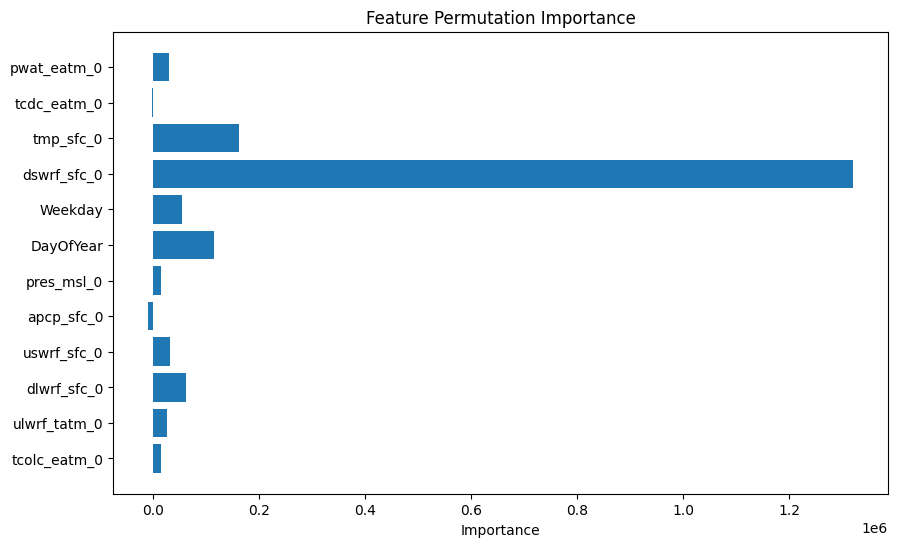

In [111]:
from sklearn.metrics import mean_absolute_error

# Use the function defined above
perm_importances = permutation_importance(model, X_test, y_test, mean_absolute_error, n_repeats=10)

# Get the feature names
feature_names = data_selected.drop(columns=['Daily Solar Energy']).columns

# Print feature importances
for i in range(len(feature_names)):
    print(f"Feature: {feature_names[i]}, Importance: {perm_importances[i]}")

# Optionally, you can visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_names, perm_importances)
plt.xlabel('Importance')
plt.title('Feature Permutation Importance')
plt.show()
